# Qiskit config

In [1]:
from qiskit import transpile
from qiskit.providers.aer.backends import AerSimulator

# Qclib

In [2]:
import numpy as np
import random
import sys
sys.path.append('../../')
from qclib.state_preparation.schmidt import initialize

In [3]:
def _overlap(input_state, transpiled_circuit):
    backend = AerSimulator()
    transpiled_circuit.save_statevector()
    ket = backend.run(transpiled_circuit).result().get_statevector()
    bra = np.conj(input_state)

    return np.abs(bra.dot(ket))**2

def _counts(input_state, r=0, result=None):
    circuit = initialize(input_state, low_rank=r)
    transpiled_circuit = transpile(circuit, basis_gates=['u1','u2','u3', 'cx'], optimization_level=3)

    count_ops = transpiled_circuit.count_ops()
    n_cx = 0
    if 'cx' in count_ops:
        n_cx = count_ops['cx']
    n_dp = transpiled_circuit.depth()
    
    overlap = _overlap(input_state, transpiled_circuit)

    if result is not None:
        result.append([int(np.log2(r)), n_cx, n_dp, overlap])

    print('\tCNOTs = {0}\tdepth = {1}\toverlap={2}'.format(n_cx, n_dp, overlap))

def _grid_search(input_state):
    result = []

    n = int(np.log2(len(input_state)))
    for m in list(range(n//2+1))[::-1]:
        r = 2**m
        print('rank = {0}:'.format(r), end='')
        _counts(input_state, r=r, result=result)

    return result

# Fixed state

In [6]:
input_state = [-0.33*1j,0,-0.44-0.44*1j,0.24+0.23*1j,0,0,0,0.62-0.01*1j]
input_state = input_state/np.linalg.norm(input_state)

_grid_search(input_state);

rank = 2:	CNOTs = 3	depth = 7	overlap=1.0000000000000004
rank = 1:	CNOTs = 1	depth = 3	overlap=0.7362378462891058


# Uniform state

In [7]:
min_n = 3
max_n = 10

for n in range(min_n, max_n+1):
    input_state = np.ones(2**n)
    input_state = input_state/np.linalg.norm(input_state)

    print('n = {0}'.format(n), end='')
    _counts(input_state)


n = 3	CNOTs = 0	depth = 1	overlap=0.9999999999999998
n = 4	CNOTs = 0	depth = 1	overlap=1.0
n = 5	CNOTs = 0	depth = 1	overlap=1.0
n = 6	CNOTs = 0	depth = 1	overlap=1.0
n = 7	CNOTs = 0	depth = 1	overlap=1.0
n = 8	CNOTs = 0	depth = 1	overlap=1.0
n = 9	CNOTs = 0	depth = 1	overlap=1.0
n = 10	CNOTs = 0	depth = 1	overlap=1.0


# Random rank 1 state

In [8]:
# input_state.reshape(lines, cols) is a matrix with equal columns.
rnd = np.random.RandomState(42)

min_n = 3
max_n = 10

for n in range(min_n, max_n+1):
    N = 2**n
    
    input_state = [1]
    for _ in range(n):
        v = np.random.rand(2) + np.random.rand(2) * 1j
        v = v / np.linalg.norm(v)
        input_state = np.kron(input_state, v)

    print('n = {0}'.format(n), end='')
    _counts(input_state)
    

n = 3	CNOTs = 0	depth = 1	overlap=1.0
n = 4	CNOTs = 0	depth = 1	overlap=0.9999999999999998
n = 5	CNOTs = 0	depth = 1	overlap=1.0000000000000009
n = 6	CNOTs = 0	depth = 1	overlap=0.9999999999999996
n = 7	CNOTs = 0	depth = 1	overlap=0.9999999999999991
n = 8	CNOTs = 0	depth = 1	overlap=0.9999999999999998
n = 9	CNOTs = 0	depth = 1	overlap=1.0000000000000004
n = 10	CNOTs = 0	depth = 1	overlap=0.9999999999999993


# Random sparse uniform state

In [9]:
rnd = np.random.RandomState(42)

min_n = 3
max_n = 10
zeros = 0.75

for n in range(min_n, max_n+1):
    n_zeros = int(2**n * zeros)
    
    input_state = random.sample([0]*n_zeros + [1]*(2**n-n_zeros), 2**n)
    input_state = input_state/np.linalg.norm(input_state)
    
    print('\nn = {0}'.format(n))
    _grid_search(input_state)


n = 3
rank = 2:	CNOTs = 1	depth = 2	overlap=0.9999999999999998
rank = 1:	CNOTs = 0	depth = 1	overlap=0.4999999999999999

n = 4
rank = 4:	CNOTs = 5	depth = 7	overlap=1.0
rank = 2:	CNOTs = 5	depth = 7	overlap=1.0000000000000004
rank = 1:	CNOTs = 2	depth = 3	overlap=0.8535533905932737

n = 5
rank = 4:	CNOTs = 27	depth = 48	overlap=1.0000000000000009
rank = 2:	CNOTs = 14	depth = 23	overlap=0.8374535185344142
rank = 1:	CNOTs = 4	depth = 7	overlap=0.5575631087523455

n = 6
rank = 8:	CNOTs = 52	depth = 54	overlap=1.0000000000000013
rank = 4:	CNOTs = 48	depth = 50	overlap=0.8896579990479794
rank = 2:	CNOTs = 21	depth = 23	overlap=0.6890785098165948
rank = 1:	CNOTs = 7	depth = 9	overlap=0.4845762940180209

n = 7
rank = 8:	CNOTs = 150	depth = 243	overlap=1.0000000000000009
rank = 4:	CNOTs = 80	depth = 112	overlap=0.8459081560457739
rank = 2:	CNOTs = 36	depth = 51	overlap=0.5598256452785608
rank = 1:	CNOTs = 13	depth = 11	overlap=0.36893668112381195

n = 8
rank = 16:	CNOTs = 244	depth = 238	over

# Random sparse states

In [10]:
rnd = np.random.RandomState(42)

min_n = 3
max_n = 10
zeros = 0.75

for n in range(min_n, max_n+1):
    n_amps = int(2**n * (1-zeros))
    amps = ((1.0 - 0.001) * rnd.rand(n_amps) + 0.001) + ((1.0 - 0.001) * rnd.rand(n_amps) + 0.001) * 1j
    
    input_state = random.sample([0]*(2**n-n_amps) + list(amps), 2**n)
    input_state = input_state/np.linalg.norm(input_state)

    print('\nn = {0}:'.format(n))
    _grid_search(input_state)


n = 3:
rank = 2:	CNOTs = 0	depth = 1	overlap=0.9999999999999996
rank = 1:	CNOTs = 0	depth = 1	overlap=0.9999999999999996

n = 4:
rank = 4:	CNOTs = 8	depth = 11	overlap=0.9999999999999993
rank = 2:	CNOTs = 4	depth = 7	overlap=0.9997188185300863
rank = 1:	CNOTs = 0	depth = 1	overlap=0.797888772773046

n = 5:
rank = 4:	CNOTs = 30	depth = 53	overlap=1.0000000000000004
rank = 2:	CNOTs = 14	depth = 23	overlap=0.8951210374955825
rank = 1:	CNOTs = 5	depth = 9	overlap=0.7150691135866982

n = 6:
rank = 8:	CNOTs = 54	depth = 57	overlap=1.0000000000000004
rank = 4:	CNOTs = 51	depth = 51	overlap=0.9363615952015873
rank = 2:	CNOTs = 21	depth = 23	overlap=0.667378687804571
rank = 1:	CNOTs = 8	depth = 9	overlap=0.42751312845741746

n = 7:
rank = 8:	CNOTs = 151	depth = 245	overlap=1.0000000000000027
rank = 4:	CNOTs = 84	depth = 115	overlap=0.8415613495255604
rank = 2:	CNOTs = 36	depth = 51	overlap=0.5756326568633854
rank = 1:	CNOTs = 13	depth = 11	overlap=0.3366775396143368

n = 8:
rank = 16:	CNOTs = 

# Random dense states

In [4]:
rnd = np.random.RandomState(42)

min_n = 3
max_n = 14

result = {}
for n in range(min_n, max_n+1):
    N = 2**n
    input_state = ((1.0 - 0.001) * rnd.rand(N) + 0.001) + ((1.0 - 0.001) * rnd.rand(N) + 0.001) * 1j
    input_state = input_state/np.linalg.norm(input_state)

    print('\nn = {0}:'.format(n))
    result[n] = _grid_search(input_state)



n = 3:
rank = 2:	CNOTs = 4	depth = 9	overlap=1.0
rank = 1:	CNOTs = 1	depth = 3	overlap=0.8639963820714042

n = 4:
rank = 4:	CNOTs = 9	depth = 11	overlap=1.0000000000000004
rank = 2:	CNOTs = 7	depth = 9	overlap=0.9541398513881694
rank = 1:	CNOTs = 2	depth = 3	overlap=0.8523366487864766

n = 5:
rank = 4:	CNOTs = 30	depth = 53	overlap=1.0000000000000009
rank = 2:	CNOTs = 14	depth = 23	overlap=0.9180325951816297
rank = 1:	CNOTs = 5	depth = 9	overlap=0.8355267226775269

n = 6:
rank = 8:	CNOTs = 54	depth = 57	overlap=1.0000000000000004
rank = 4:	CNOTs = 51	depth = 51	overlap=0.9651243971361331
rank = 2:	CNOTs = 21	depth = 23	overlap=0.8856265648665069
rank = 1:	CNOTs = 8	depth = 9	overlap=0.8102444206625559

n = 7:
rank = 8:	CNOTs = 150	depth = 243	overlap=1.0000000000000027
rank = 4:	CNOTs = 84	depth = 115	overlap=0.9463865909153708
rank = 2:	CNOTs = 36	depth = 51	overlap=0.8688590223719743
rank = 1:	CNOTs = 13	depth = 11	overlap=0.8074188924056094

n = 8:
rank = 16:	CNOTs = 253	depth = 24

# Plot dense results

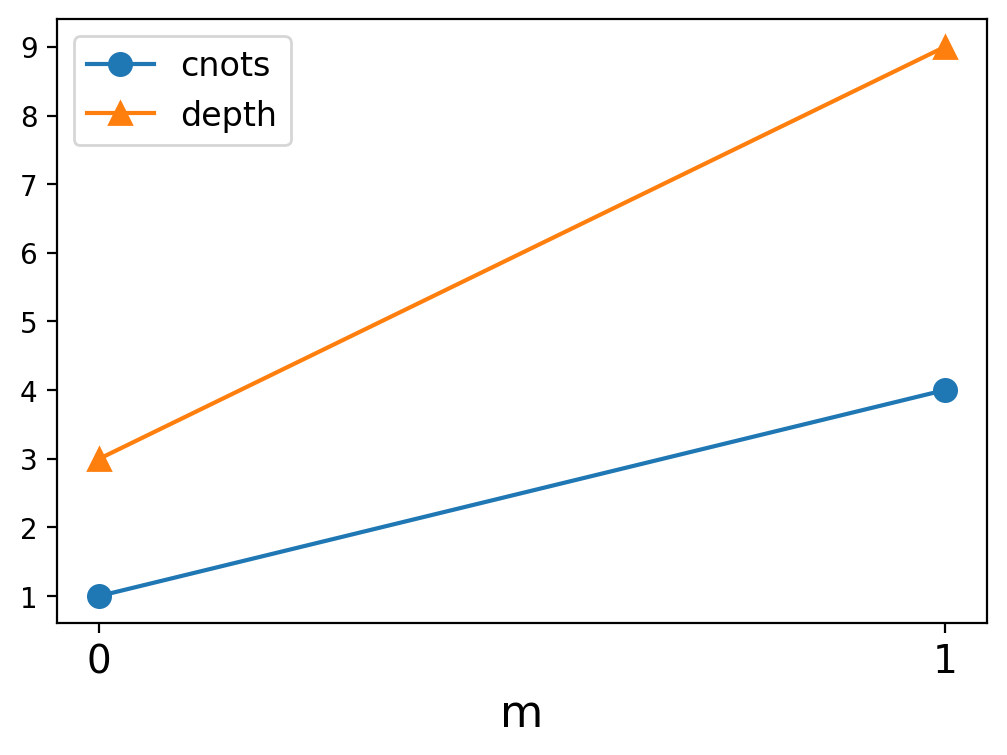

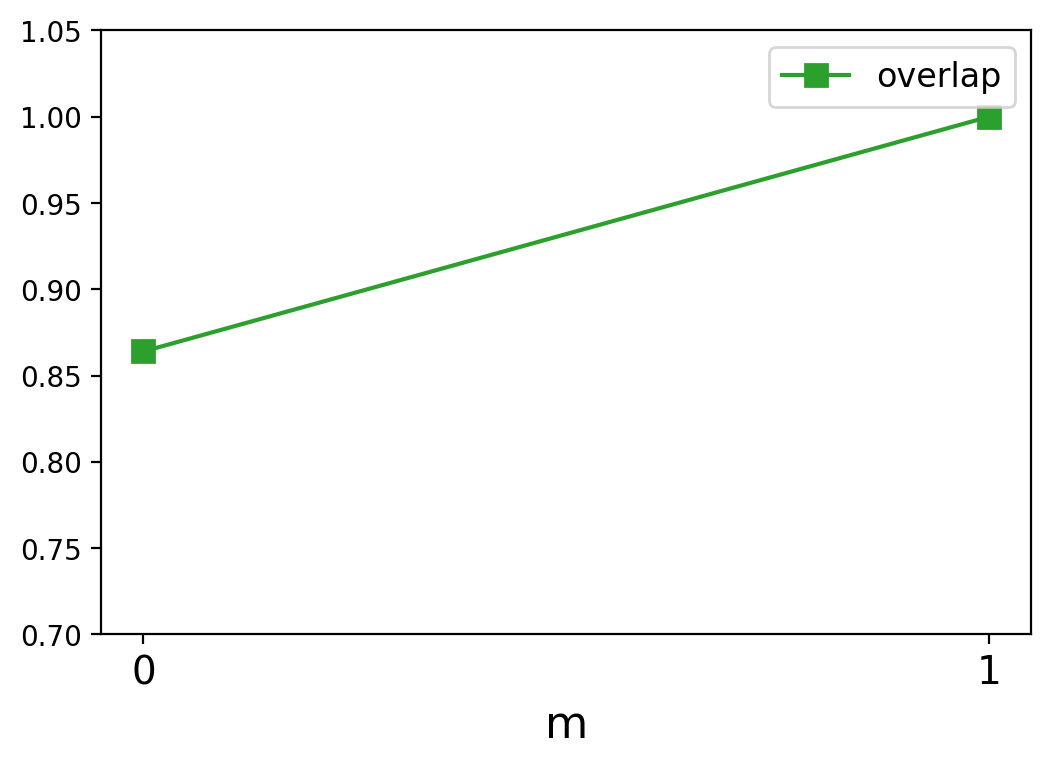

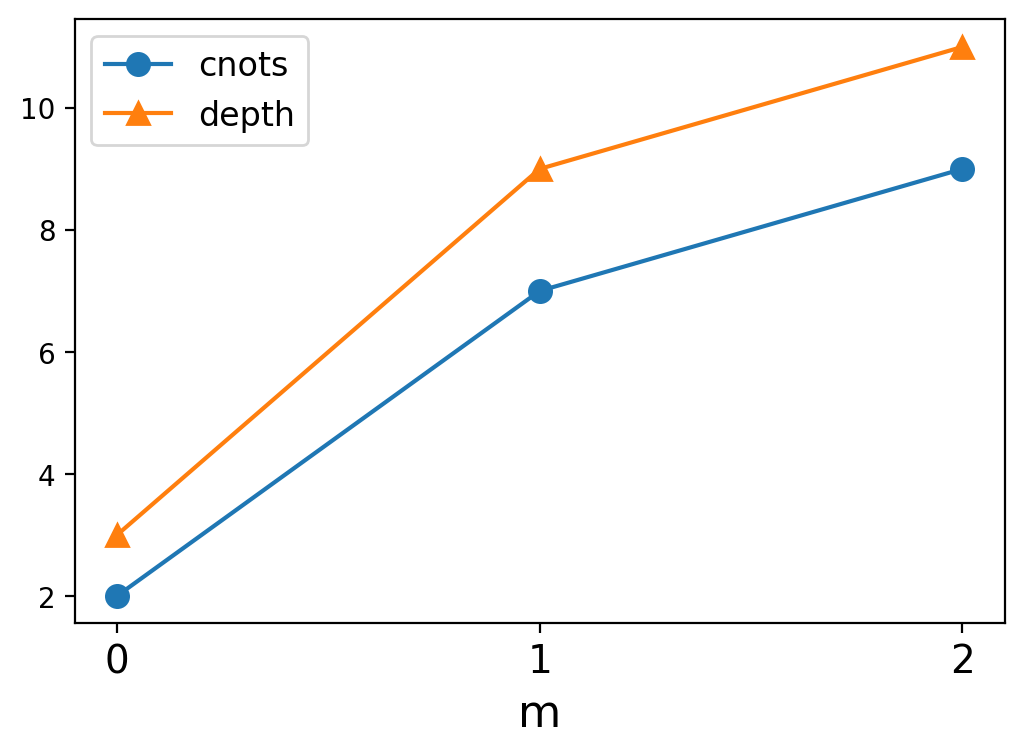

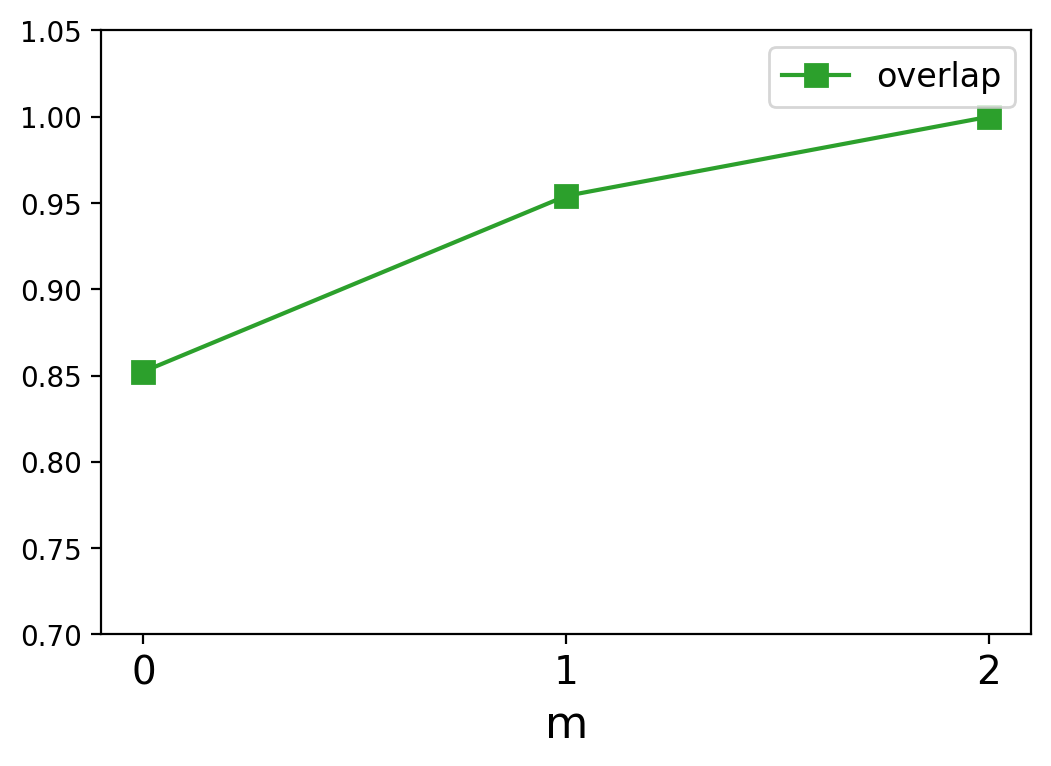

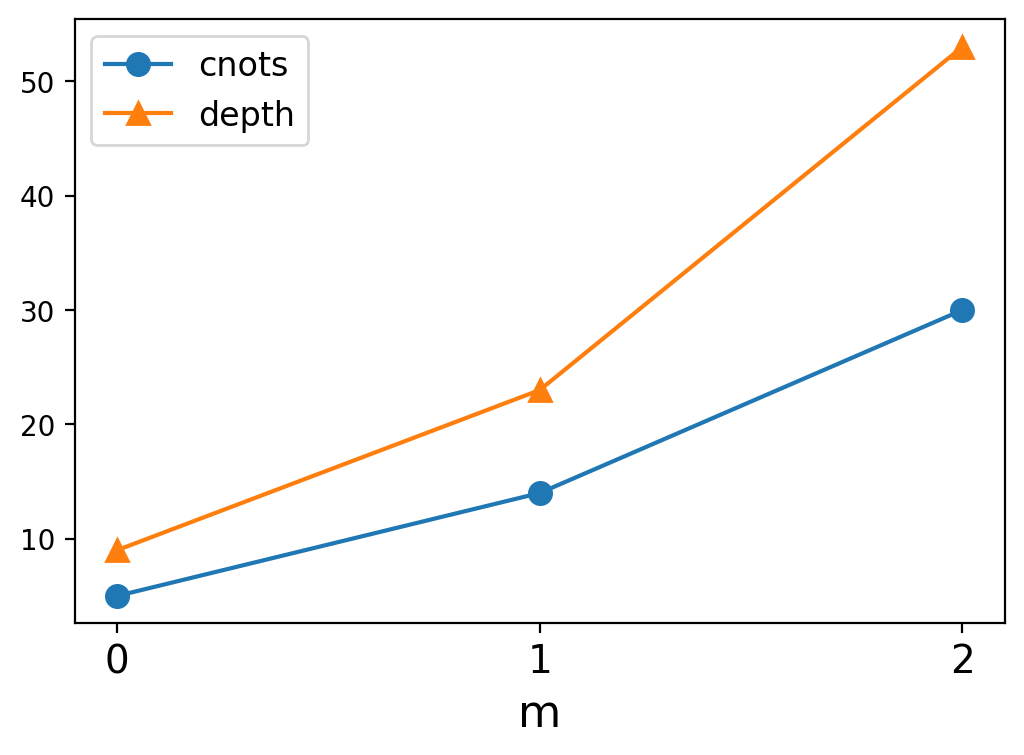

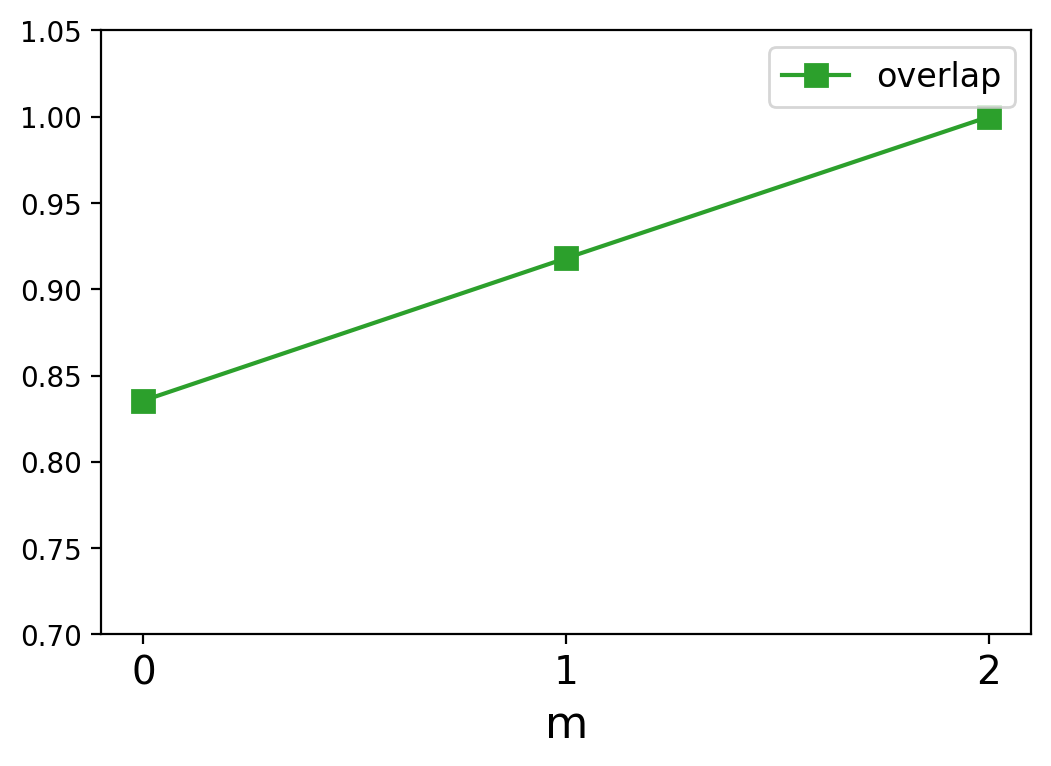

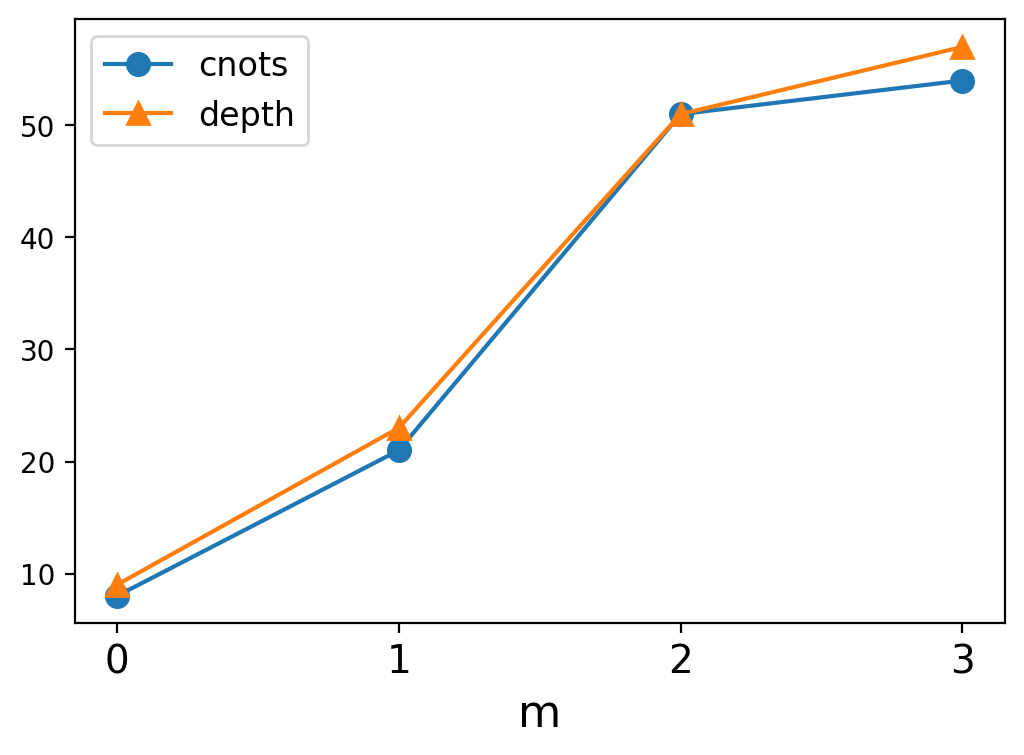

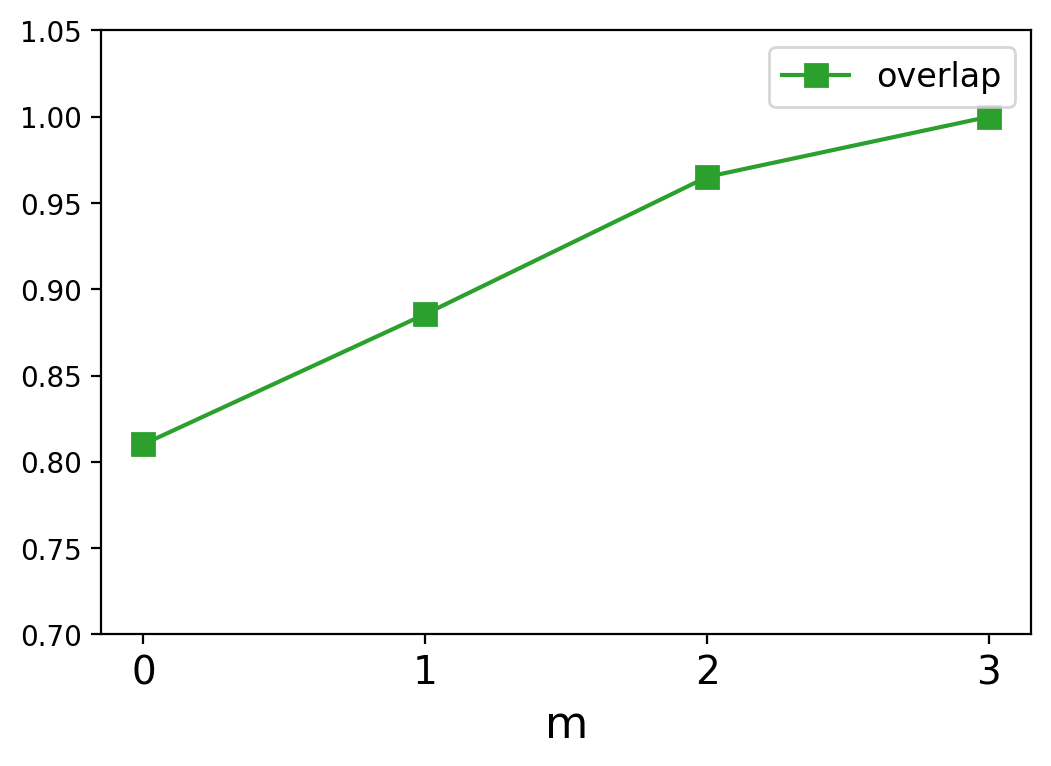

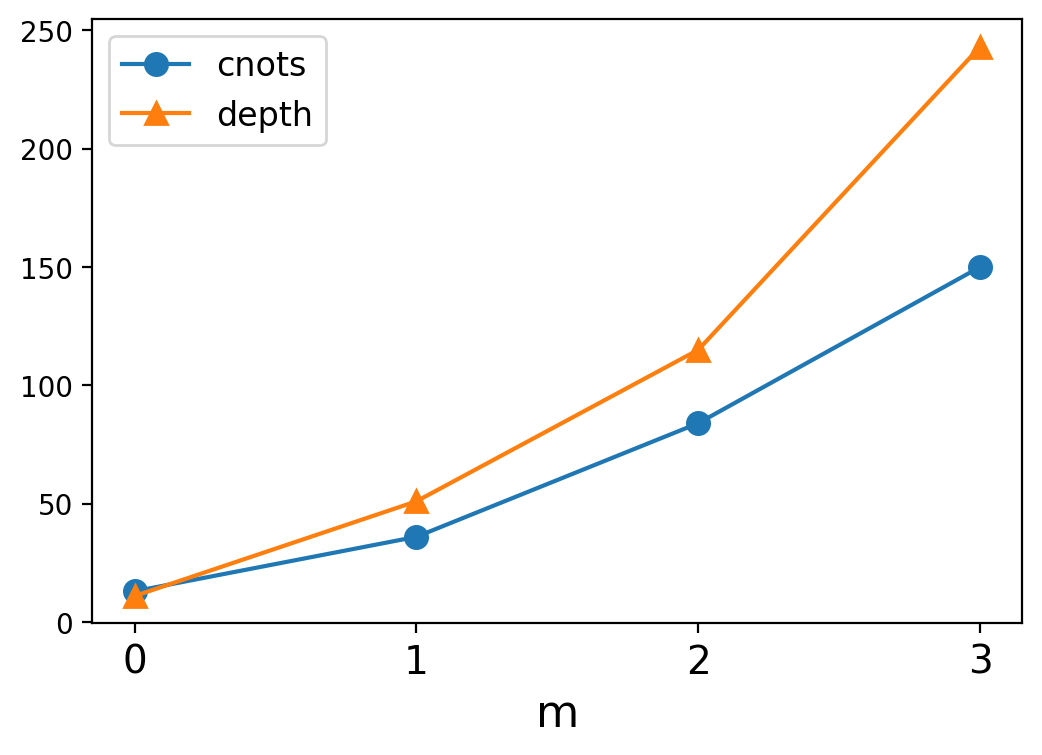

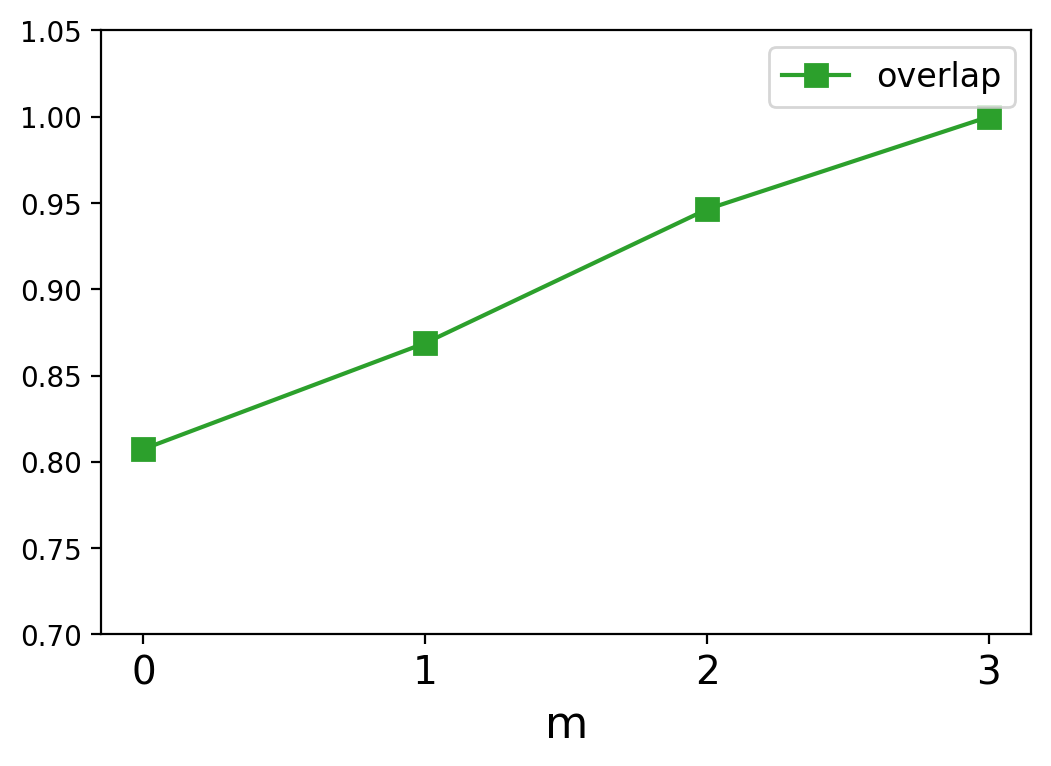

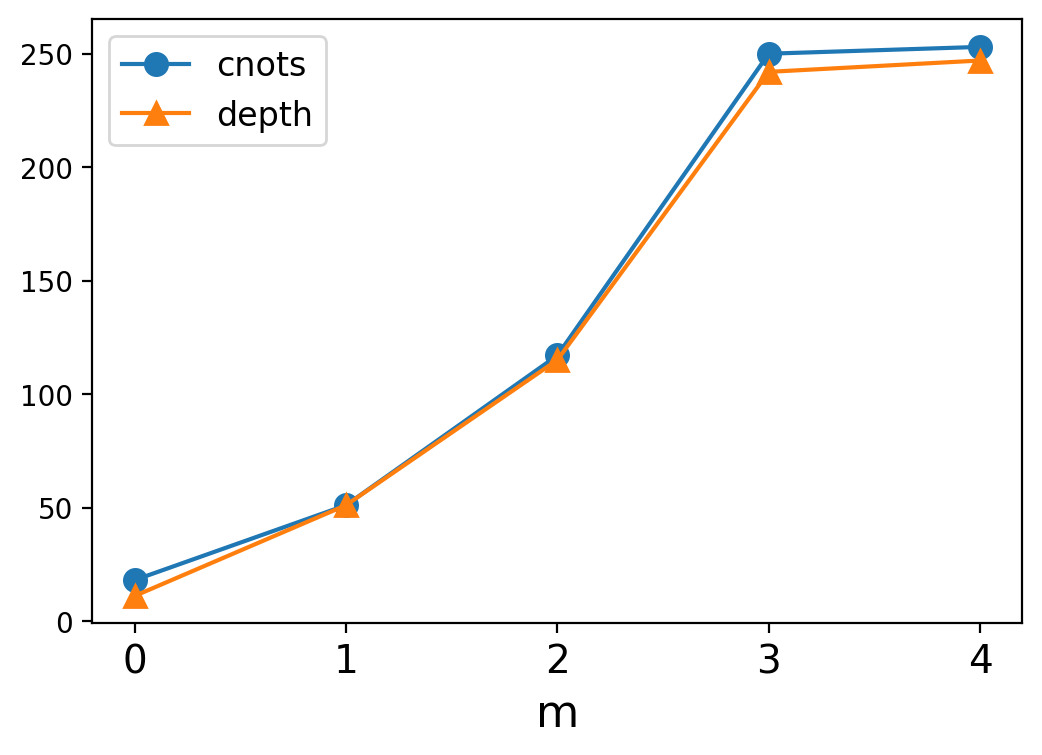

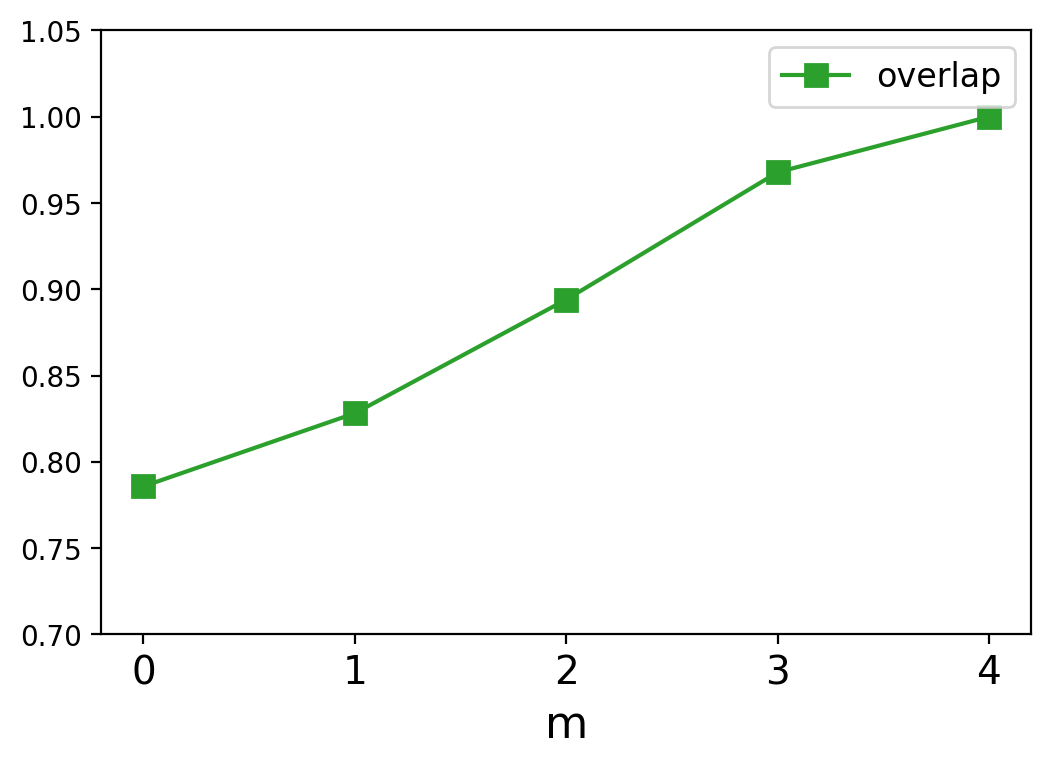

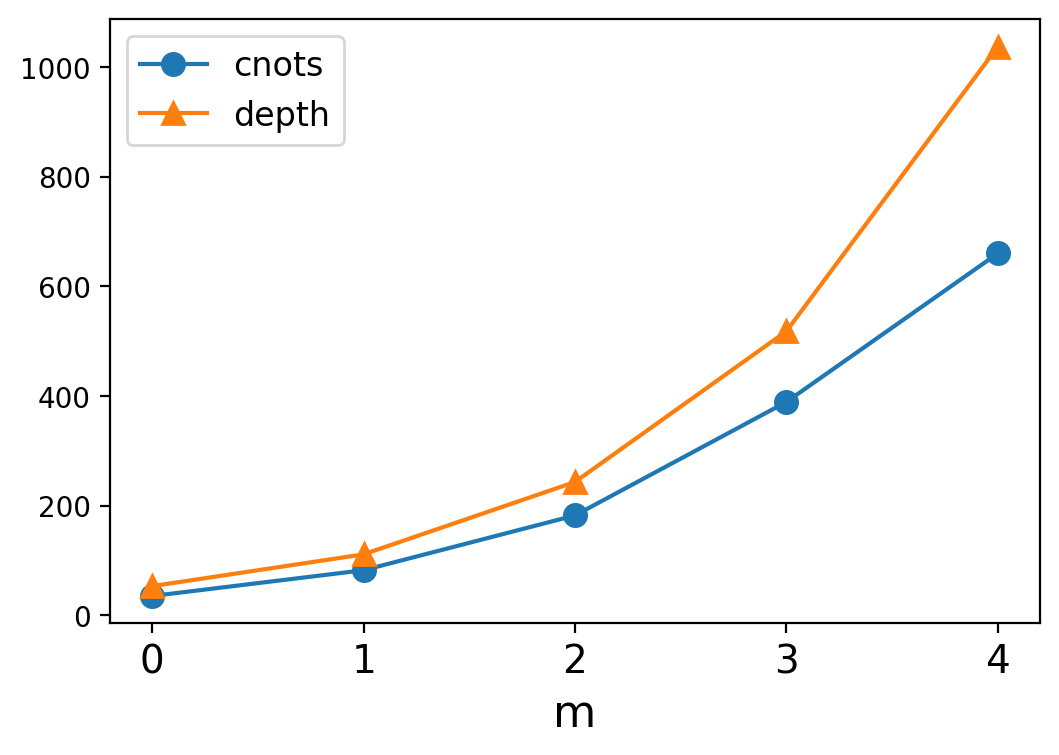

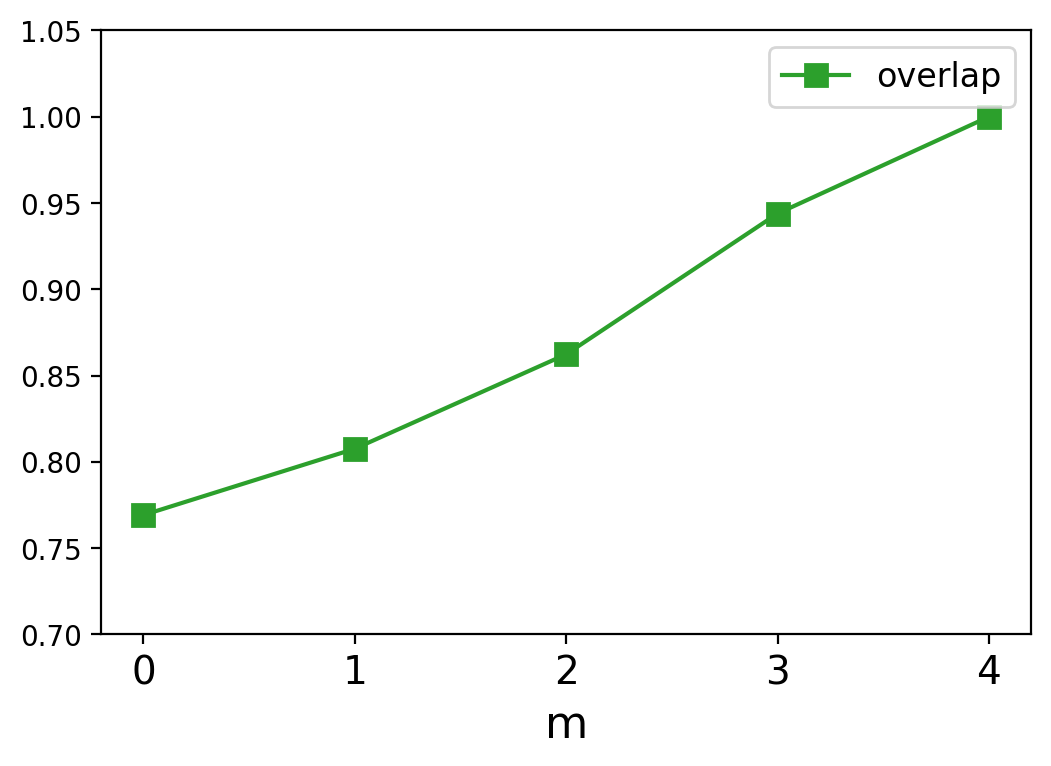

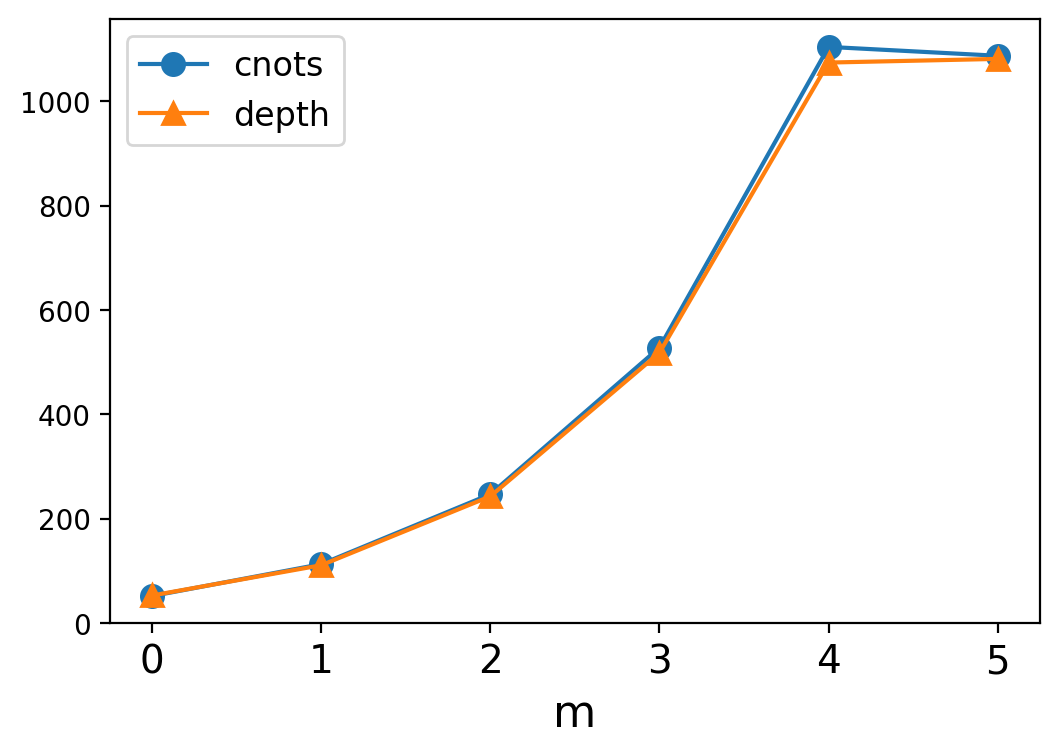

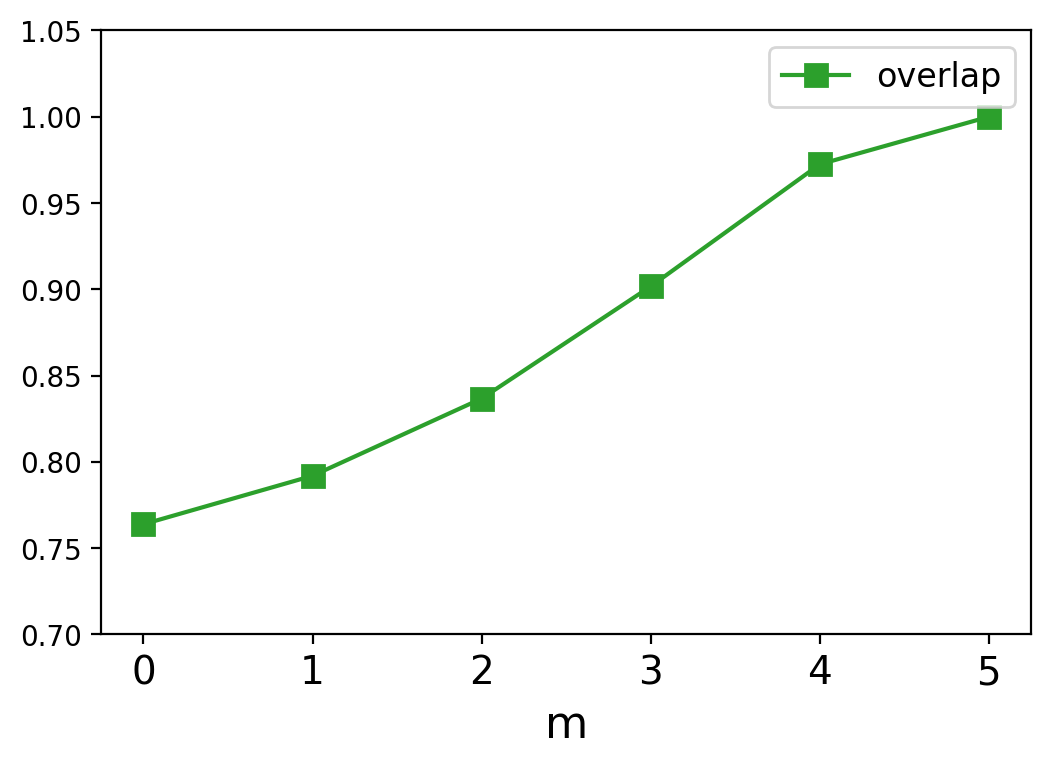

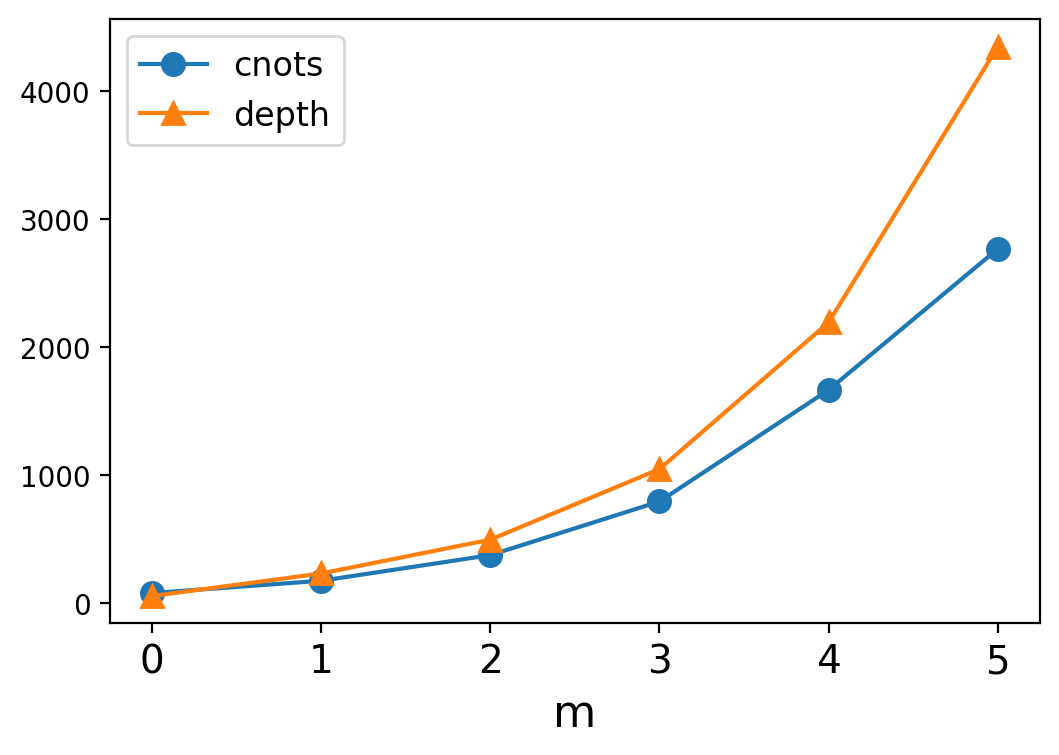

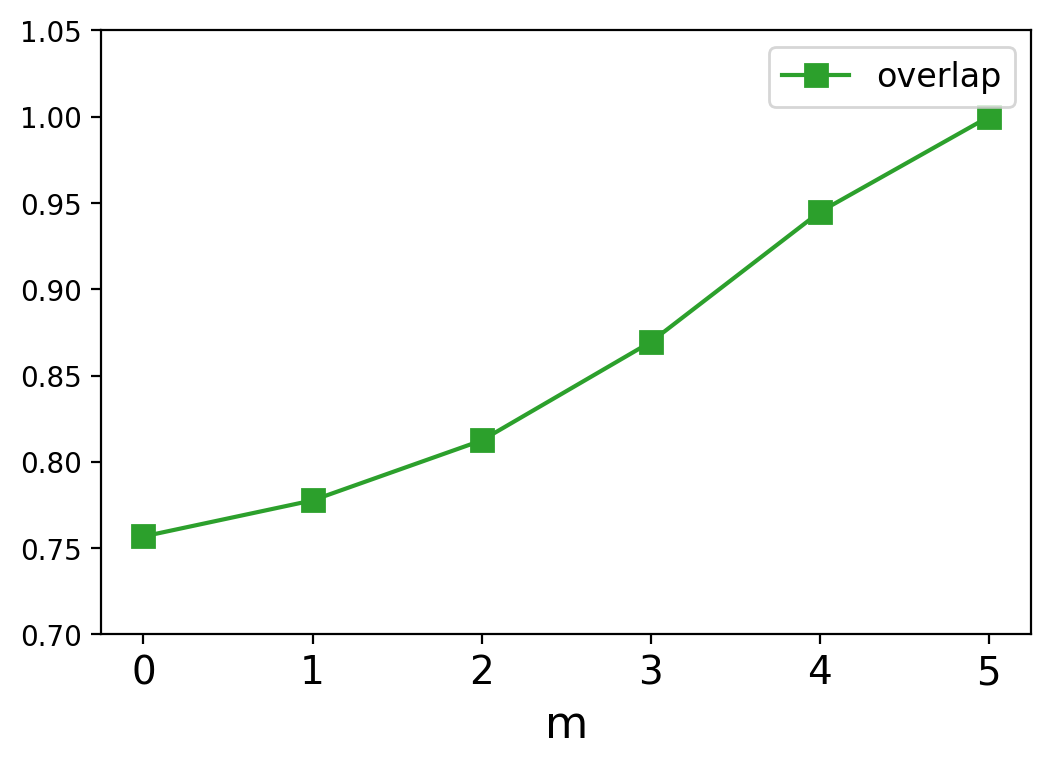

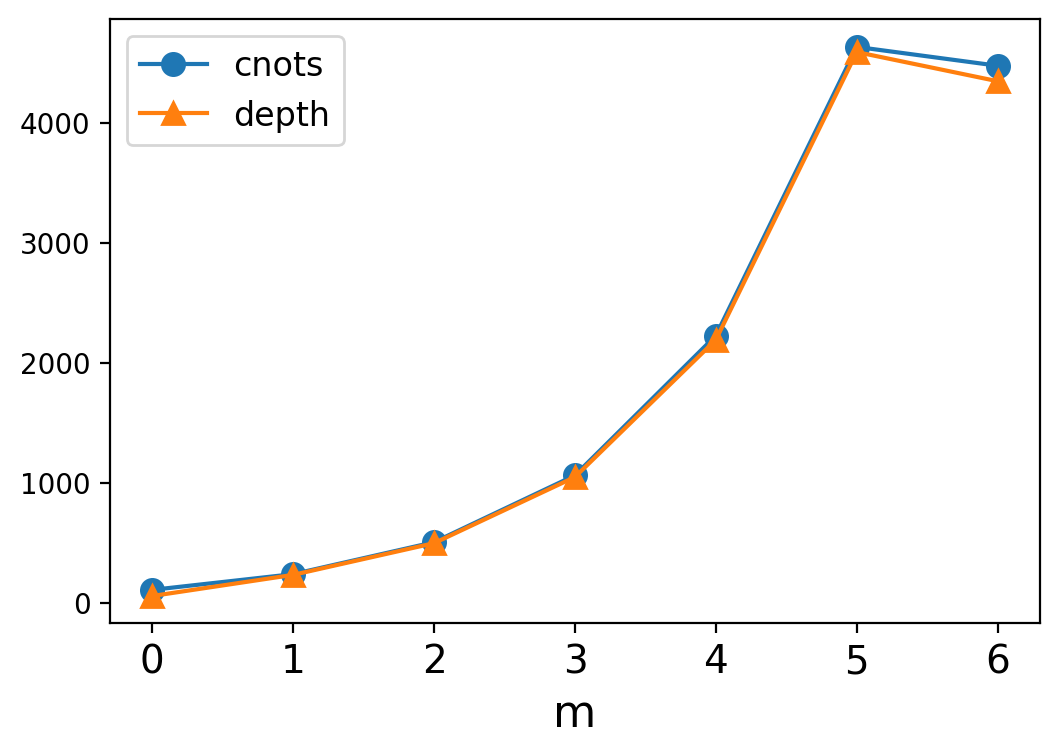

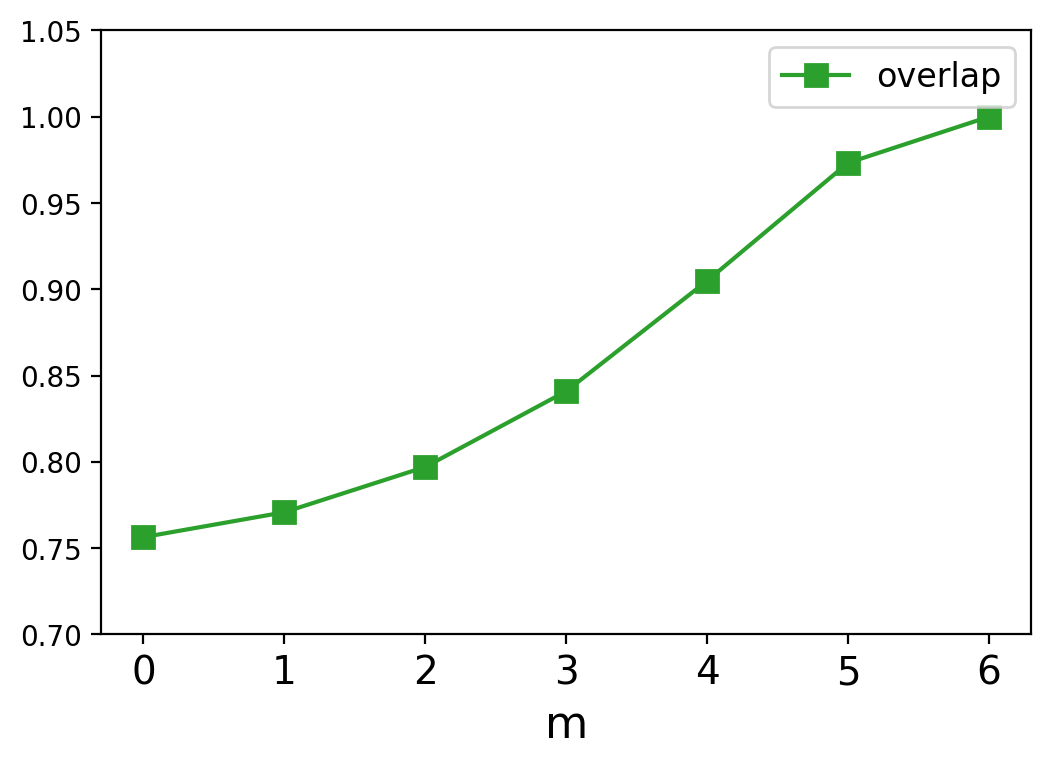

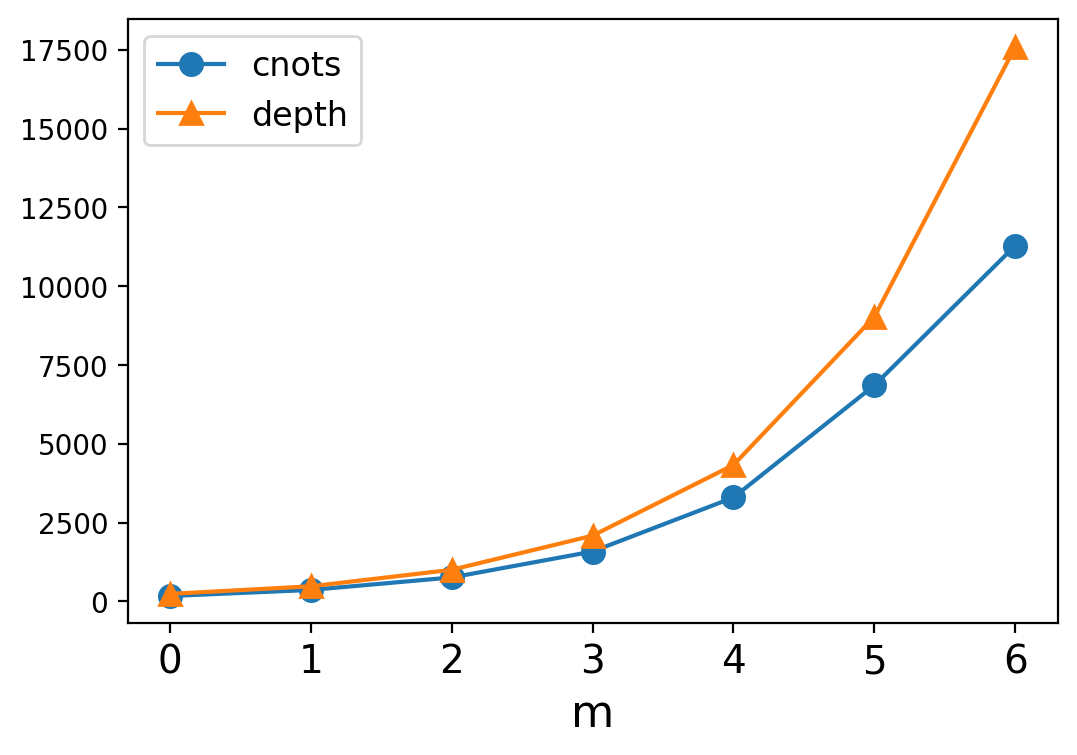

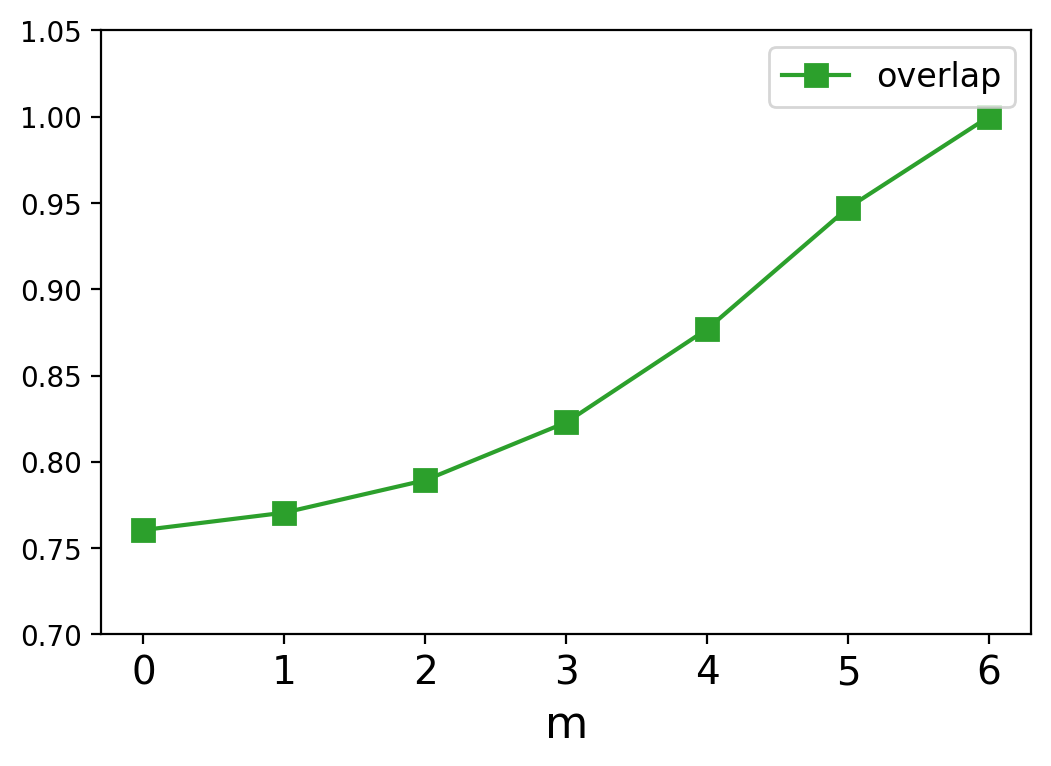

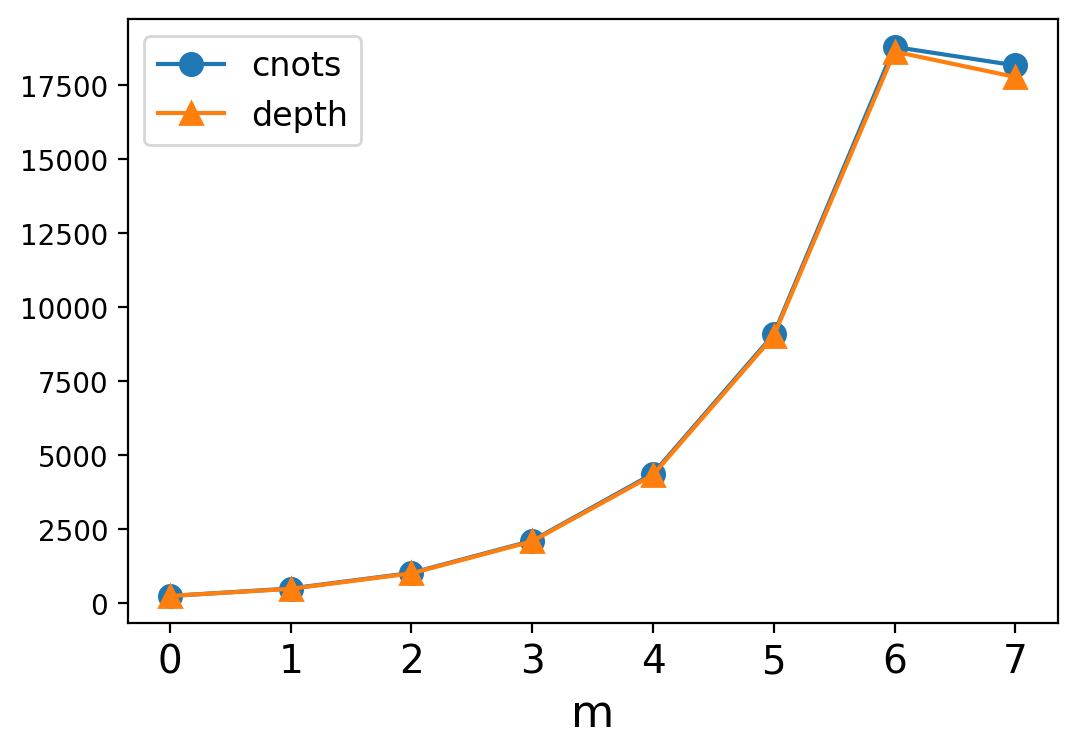

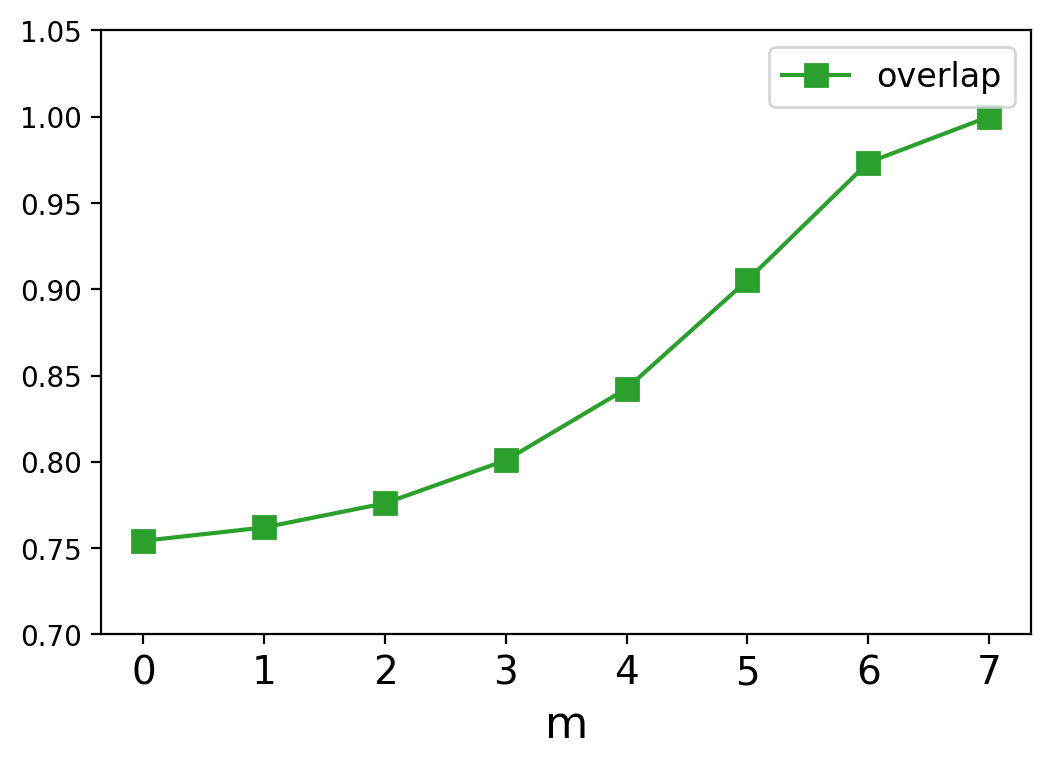

In [5]:
def plot1(r, overlap):
    # libraries
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from matplotlib.ticker import FormatStrFormatter

    # Data
    df=pd.DataFrame({ 'x_values': r, 'overlap': overlap })

    # multiple line plots
    plt.plot( 'x_values', 'overlap', 'C2' , data=df, marker='s', markersize=8)
    plt.xticks(r) # force integer on x axis
    # show legend
    plt.legend()
    
    # config
    plt.legend(fontsize=12)
    plt.xticks(r, fontsize=14)
    plt.xlabel('m', fontsize=16)
    plt.gcf().set_dpi(200)
    
    # format y axis numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylim([0.7, 1.05])

    # show graph
    plt.show()

def plot2(r, n_cx, n_dp):
    # libraries
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Data
    df=pd.DataFrame({ 'x_values': r, 'cnots': n_cx, 'depth': n_dp })

    # multiple line plots
    plt.plot( 'x_values', 'cnots' , data=df, marker='o', markersize=8)
    plt.plot( 'x_values', 'depth' , data=df, marker='^', markersize=8)
    plt.xticks(r) # force integer on x axis
    # show legend
    plt.legend()
    
    # config
    plt.legend(fontsize=12)
    plt.xticks(r, fontsize=14)
    plt.xlabel('m', fontsize=16)
    plt.gcf().set_dpi(200)
    
    # show graph
    plt.show()

def plot_result(n, result):
    r_range = [r[0] for r in result[n]]
    n_cx    = [r[1] for r in result[n]]
    n_dp    = [r[2] for r in result[n]]

    plot2(r_range, n_cx, n_dp)

def plot_overlap(n, result):
    r_range = [r[0] for r in result[n]]
    overlap = [r[3] for r in result[n]]

    plot1(r_range, overlap)

for n in range(min_n, max_n+1):
    plot_result(n, result)
    plot_overlap(n, result)
